### Adama Konate - IS362 FINAL PROJECT

#### For my project, I decided to analyse the best-selling games. I will obtain and plot the most sold platforms and producers.

In [18]:
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import requests

In [3]:
platformslist = pd.read_csv("platform.csv")

In [4]:
platformslist

,PC,Platform,Company
0,0,PC,PC
1,1,Playstation 4,PS4
2,2,Xbox One,XBOXONE
3,3,Wii U,wii-u
4,4,Nintendo Switch,Switch
5,5,Playstation 3,PS3
6,6,XBOX 360,XBOX360
7,7,Wii,Wii
8,8,Mac,Mac
9,9,Linux,Linux


In [5]:
platformslist["Platform"].count()

40

### Import rank of best seller video game

In [6]:
vgrank = pd.read_csv("vgsales.csv")

In [7]:
vgrank

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Best Rank Platform Count

In [8]:
marketrate = vgrank.groupby(['Platform']).size().sort_values(ascending=False)

In [9]:
marketrate

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
dtype: int64

### Sales totals for each platform

In [10]:
vgrank.groupby(['Platform'])['Global_Sales'].agg('sum').sort_values(ascending=False)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

### Sales total by company

In [11]:
vgrank.groupby(['Publisher'])['Global_Sales'].agg('sum').sort_values(ascending=False)

Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
                                ...   
Takuyo                            0.01
Otomate                           0.01
Epic Games                        0.01
Inti Creates                      0.01
Interworks Unlimited, Inc.        0.01
Name: Global_Sales, Length: 578, dtype: float64

In [12]:
vgrank.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### Sales totals for each group

In [13]:
vgrank2=pd.read_csv("group.csv",header=None)

In [14]:
vgrank2

,0,1,2,3,4,5,6,7,8,9,10
0,90,Pac-Man,2600,1982,Puzzle,Atari,90.60,5.47,0.00,0.91,97.08
1,12637,Policenauts,3DO,1995,Adventure,Konami Digital Entertainment,0.00,0.00,0.10,0.00,0.10
2,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,78.87,58.52,97.35,12.63,247.46
3,638,Sonic Adventure,DC,1998,Platform,Sega,5.43,1.69,8.56,0.27,15.97
4,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,390.71,194.65,175.57,60.53,822.49
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,114.32,47.82,85.12,8.20,255.45
6,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,187.54,75.25,47.33,7.73,318.50
7,108,Super Smash Bros. Melee,GC,2001,Fighting,Nintendo,133.46,38.71,21.58,5.18,199.36
8,144,Sonic the Hedgehog 2,GEN,1992,Platform,Sega,19.27,5.52,2.67,0.89,28.36
9,13527,Sonic the Hedgehog 2 (8-bit),GG,1992,Platform,Sega,0.00,0.00,0.04,0.00,0.04


In [27]:
vgrank2.columns=["Rank","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]


In [26]:
vgrank2.drop(["Rank"],axis=1)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Pac-Man,2600,1982,Puzzle,Atari,90.60,5.47,0.00,0.91,97.08
1,Policenauts,3DO,1995,Adventure,Konami Digital Entertainment,0.00,0.00,0.10,0.00,0.10
2,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,78.87,58.52,97.35,12.63,247.46
3,Sonic Adventure,DC,1998,Platform,Sega,5.43,1.69,8.56,0.27,15.97
4,New Super Mario Bros.,DS,2006,Platform,Nintendo,390.71,194.65,175.57,60.53,822.49
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,114.32,47.82,85.12,8.20,255.45
6,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,187.54,75.25,47.33,7.73,318.50
7,Super Smash Bros. Melee,GC,2001,Fighting,Nintendo,133.46,38.71,21.58,5.18,199.36
8,Sonic the Hedgehog 2,GEN,1992,Platform,Sega,19.27,5.52,2.67,0.89,28.36
9,Sonic the Hedgehog 2 (8-bit),GG,1992,Platform,Sega,0.00,0.00,0.04,0.00,0.04


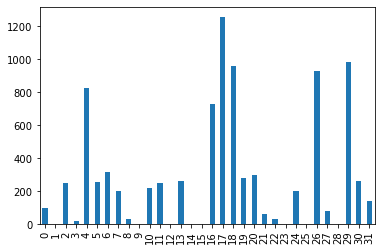

In [24]:
graph = vgrank2['Global_Sales'].plot(kind='bar')

### Conclusion:
#### The best-selling game is San Andreas (GTA). The less-selling game is Blue Breaker: Ken Yorimo Hohoemi.

### Finally, saving the results by exporting the data to a CSV file.

In [22]:
vgrank.to_csv('final.csv')